# Import libraries

In [1702]:
import pandas as pd

import numpy as np
import statsmodels as sm

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns

# Set constants

In [1703]:
# paths
FONT_PATH     = '../extra/Cinzel-VariableFont_wght.ttf'
DATASETS_PATH = '../data'
IMAGES_PATH   = '../images'
# colors
RED        = '#6F1D1B'
RICH_BLACK = '#011627'
# font size
SIZE_TICKS = 12

# Load fonts

In [1704]:
cinzel_font = fm.FontProperties(fname=FONT_PATH)
fm.fontManager.addfont(FONT_PATH)

# Define styles

In [1705]:
# regular time series plot style
classic_style = {
    "font.family": cinzel_font.get_name(), # apply Cinzel font
    "font.size": 16
}

# lag plot style
lag_plot_style = {
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.grid": True,
    "grid.color": "#8D99AE",
}

# acf plot style
acf_plot_style = {
    "font.family": cinzel_font.get_name(), # apply Cinzel font
    "font.size": 24
}

<center> <h1> Regular Time Series Plots </h1> </center>

In [1706]:
plt.rcdefaults() # reset to defauls

## Helper functions

In [1707]:
# helper function to decorate plots
def decorate_regular_plot(ax, xname: str, 
                              yname: str, 
                              loc=None) -> None:
    SIZE_TICKS = 12

    # eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # x axis name
    ax.set_xlabel(xname, fontsize=15)

    # y axis name
    ax.set_ylabel(yname, fontsize=15)

    # adjust the font size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    if loc:
        plt.legend(fontsize=10, loc=loc)

    # adjust layout
    plt.tight_layout()

### France Electricity Consumption

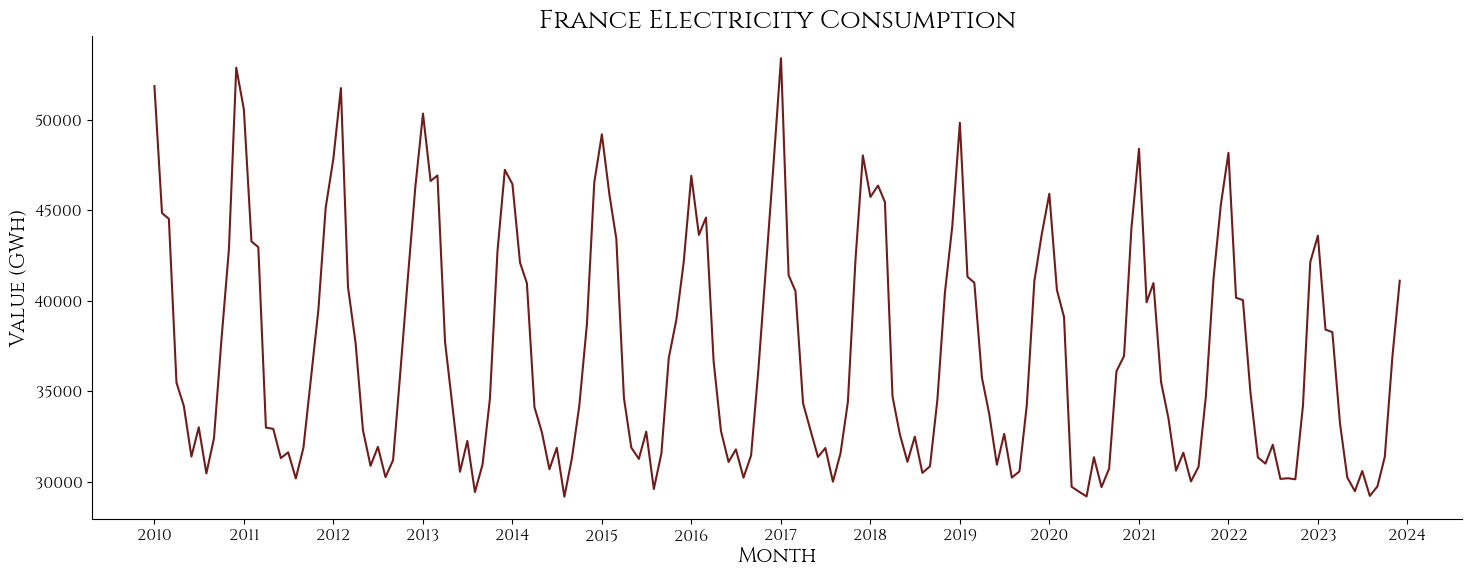

In [1708]:
# load data
electricity_df = pd.read_csv(
    f'{DATASETS_PATH}/global_electricity_production_data.csv',
    parse_dates=['date'],
    dayfirst=False
)

# process data
France_df = electricity_df[
    (electricity_df['country_name'] == 'France') & 
    (electricity_df['product'] == 'Electricity') & 
    (electricity_df['parameter'] == 'Final Consumption (Calculated)')
].copy().set_index('date').sort_index()

# Monthly averages
# France_monthly = France_df['value'].resample('M').mean()

# create plot 
with plt.rc_context(classic_style): # use context for styles not to interfere
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.plot(France_df.index, France_df['value'], color=RED, linewidth=1.5)

    ax.set_title('France Electricity Consumption')
    decorate_regular_plot(ax, 'Month', 'Value (GWh)')

    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    # ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))  # Quarterly minor ticks

    # plt.savefig(f'{IMAGES_PATH}/time_series_example_France.png', dpi=300, transparent=True)

    plt.show()

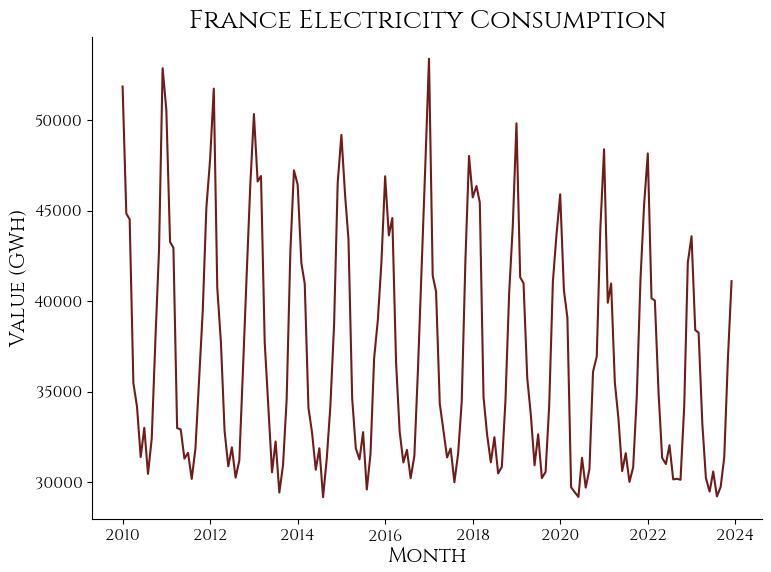

In [ ]:
# create plot 
with plt.rc_context(classic_style): # use context for styles not to interfere
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(France_df.index, France_df['value'], color=RED, linewidth=1.5)

    ax.set_title('France Electricity Consumption')
    decorate_regular_plot(ax, 'Month', 'Value (GWh)')

    # plt.savefig(f'{IMAGES_PATH}/time_series_example_France_small.png', dpi=300, transparent=True)

    plt.show()

### Avocado Sales

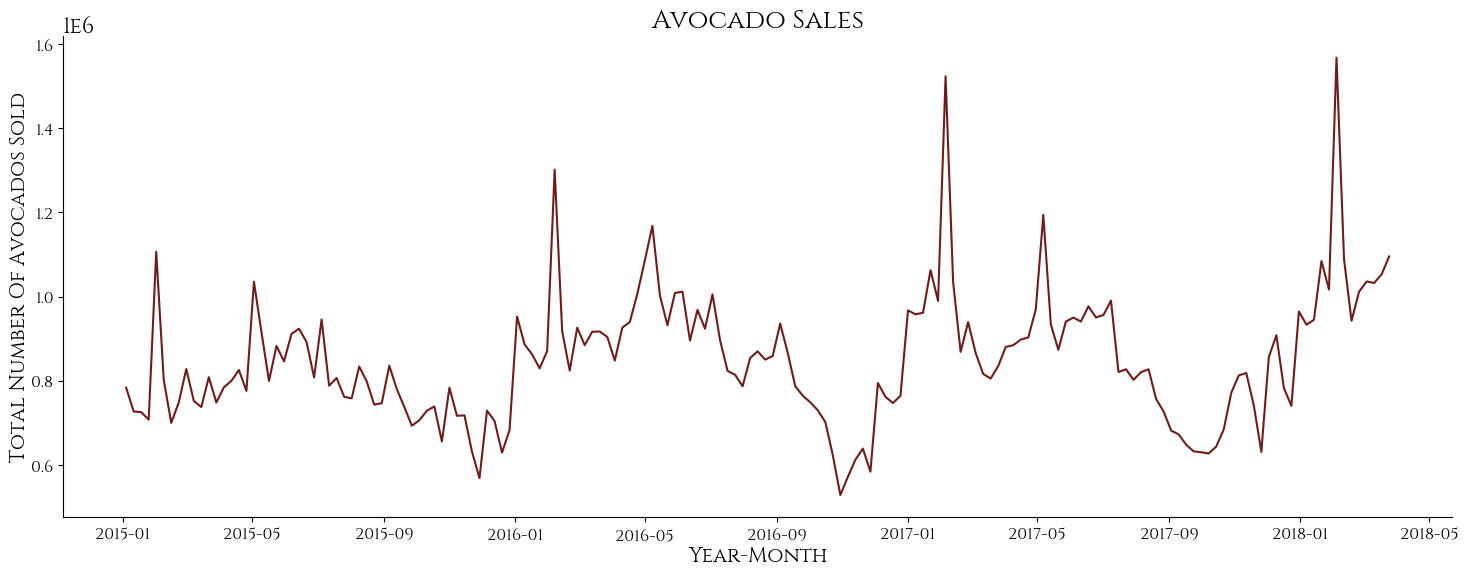

In [1710]:
# load data
avocado_df = pd.read_csv(
    f'{DATASETS_PATH}/avocado.csv',
    parse_dates=['Date'],
    dayfirst=False
)

# process data
avocado_df = avocado_df.groupby('Date')['Total Volume'].mean().reset_index()
avocado_df = avocado_df.set_index('Date').sort_index()

# create plot
with plt.rc_context(classic_style): # use context for styles not to interfere
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.plot(avocado_df.index, avocado_df['Total Volume'], color=RED, linewidth=1.5)

    ax.set_title('Avocado Sales')
    decorate_regular_plot(ax, 'Year-Month', 'Total Number Of Avocados Sold')

    # plt.savefig(f'{IMAGES_PATH}/time_series_example_avocado.png', dpi=300, transparent=True)

    plt.show()

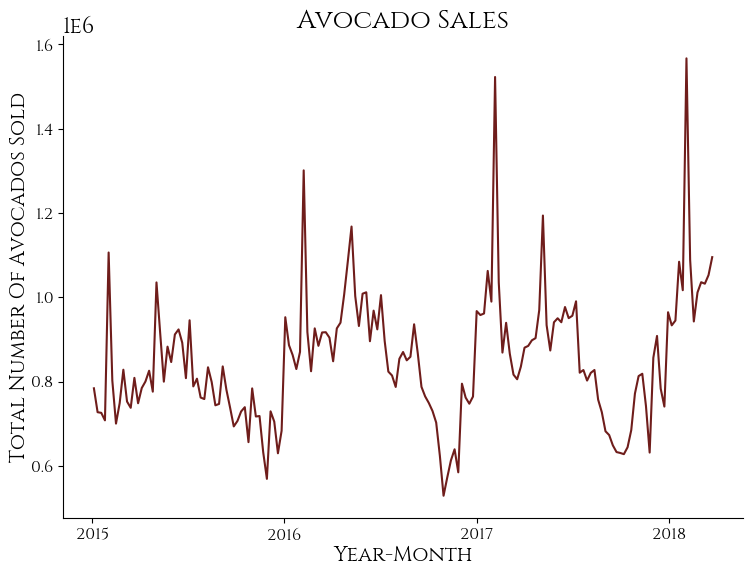

In [ ]:
# create plot
with plt.rc_context(classic_style): # use context for styles not to interfere
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(avocado_df.index, avocado_df['Total Volume'], color=RED, linewidth=1.5)

    ax.set_title('Avocado Sales')
    decorate_regular_plot(ax, 'Year-Month', 'Total Number Of Avocados Sold')
    
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # plt.savefig(f'{IMAGES_PATH}/time_series_example_avocado_small.png', dpi=300, transparent=True)

    plt.show()

### Wine Australia

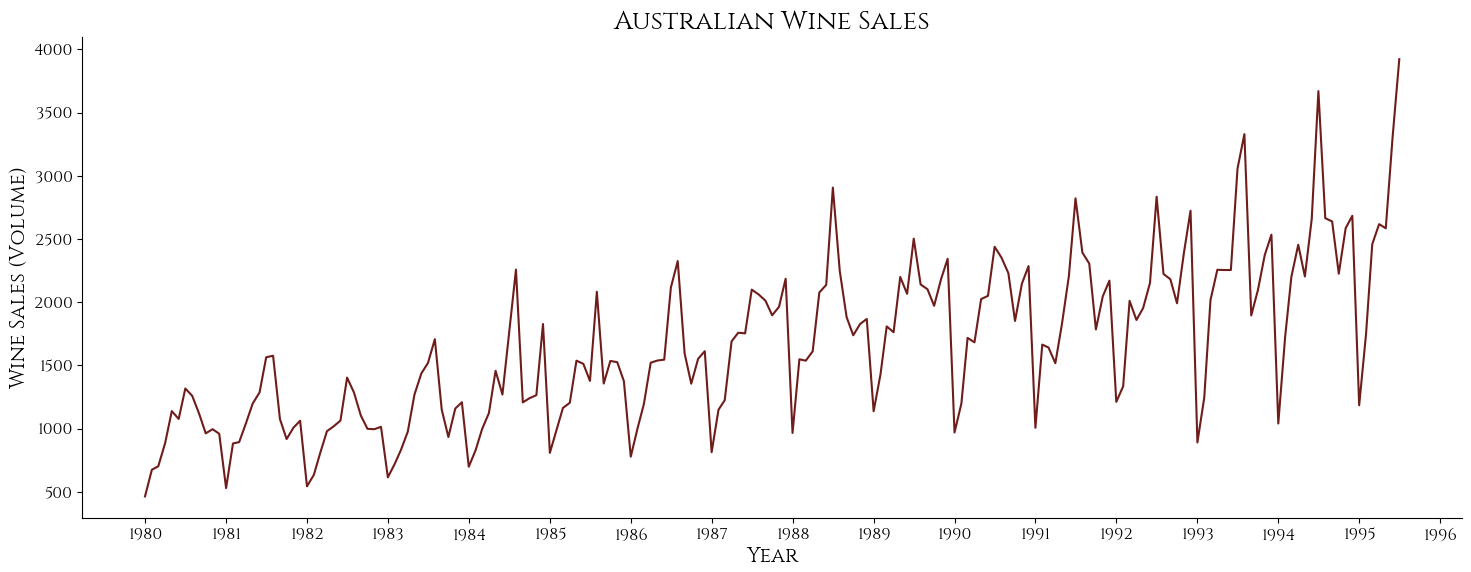

In [1712]:
# load data
wine_df = pd.read_csv(
    f'{DATASETS_PATH}/AusWineSales.csv',
    parse_dates=['YearMonth'],
    dayfirst=False
).set_index('YearMonth').sort_index()

# create plot
with plt.rc_context(classic_style): # use context for styles not to interfere
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.plot(wine_df.index, wine_df['Red'], color=RED, linewidth=1.5)

    ax.set_title('Australian Wine Sales')
    decorate_regular_plot(ax, 'Year', 'Wine Sales (Volume)')

    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # plt.savefig(f'{IMAGES_PATH}/time_series_example_wine.png', dpi=300, transparent=True)

    plt.show()

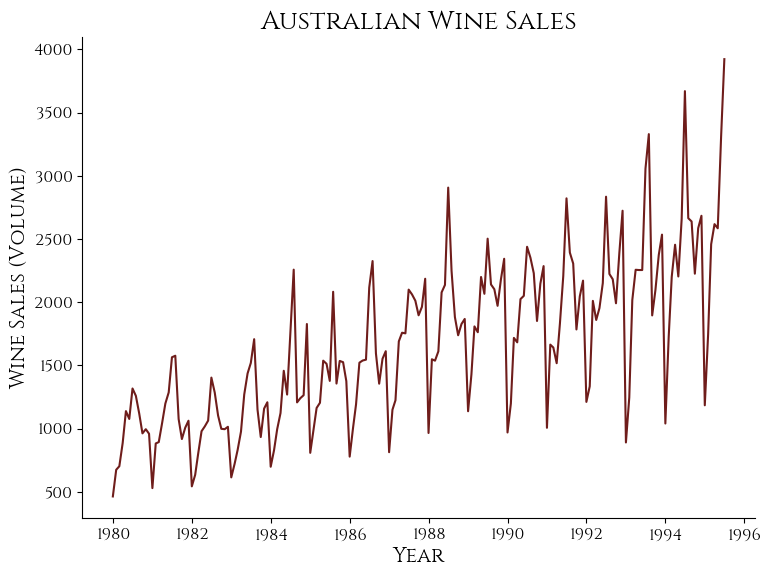

In [ ]:
# create plot
with plt.rc_context(classic_style): # use context for styles not to interfere
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(wine_df.index, wine_df['Red'], color=RED, linewidth=1.5)

    ax.set_title('Australian Wine Sales')
    decorate_regular_plot(ax, 'Year', 'Wine Sales (Volume)')

    # plt.savefig(f'{IMAGES_PATH}/time_series_example_wine_small.png', dpi=300, transparent=True)

    plt.show()

### Gold Price

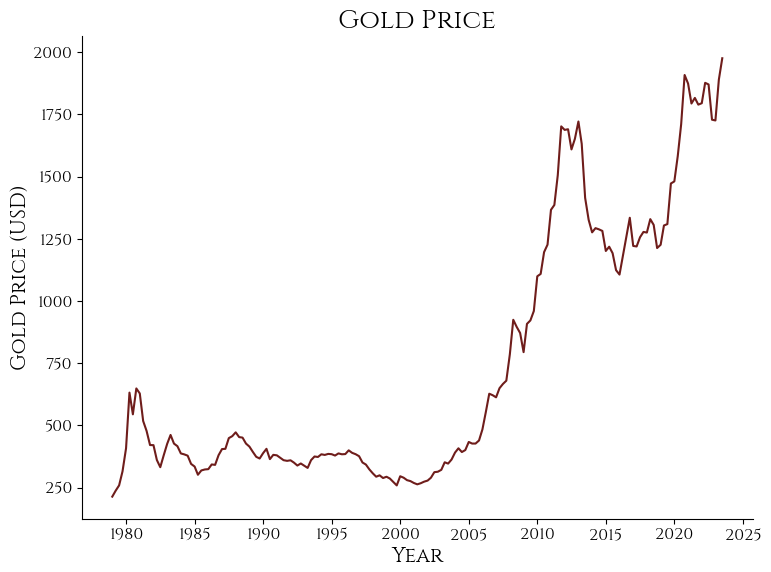

In [ ]:
# load data
gold_df = pd.read_csv(
    f'{DATASETS_PATH}/gold_prices_quarterly.csv',
    parse_dates=['Date'],
    dayfirst=False
).set_index('Date').sort_index()

# process data
gold_df['USD'] = gold_df['USD'].str.replace(',', '').astype(float)

# create plot
with plt.rc_context(classic_style): # use context for styles not to interfere
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(gold_df.index, gold_df['USD'], color=RED, linewidth=1.5)

    ax.set_title('Gold Price')
    decorate_regular_plot(ax, 'Year', 'Gold Price (USD)')

    # plt.savefig(f'{IMAGES_PATH}/time_series_example_gold_small.png', dpi=300, transparent=True)

    plt.show()

### Dow Jones Index

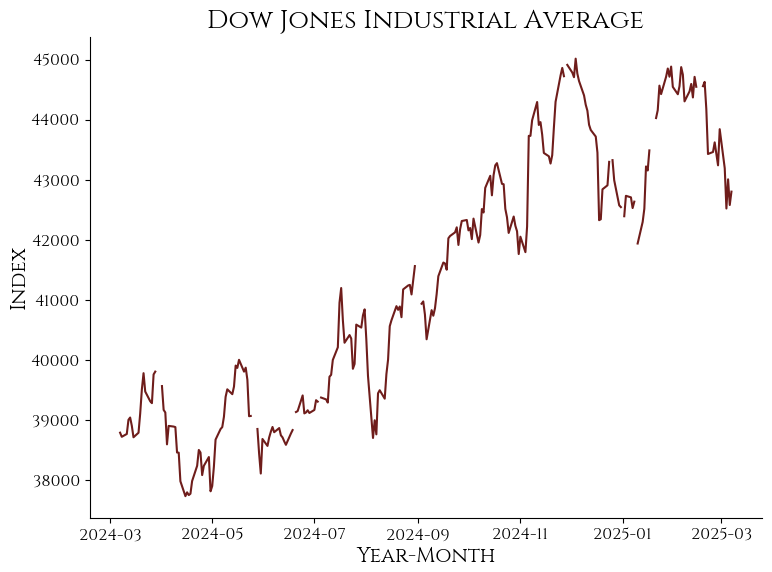

In [ ]:
# load data
dowJones_df = pd.read_csv(
    f'{DATASETS_PATH}/DJIA.csv',
    parse_dates=['observation_date'],
    dayfirst=False
).set_index('observation_date').sort_index()

# create plot
with plt.rc_context(classic_style): # use context for styles not to interfere
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(dowJones_df.index, dowJones_df['DJIA'], color=RED, linewidth=1.5)

    ax.set_title('Dow Jones Industrial Average')
    decorate_regular_plot(ax, 'Year-Month', 'Index')

    # plt.savefig(f'{IMAGES_PATH}/time_series_example_Dow_Jones_small.png', dpi=300, transparent=True)

    plt.show()

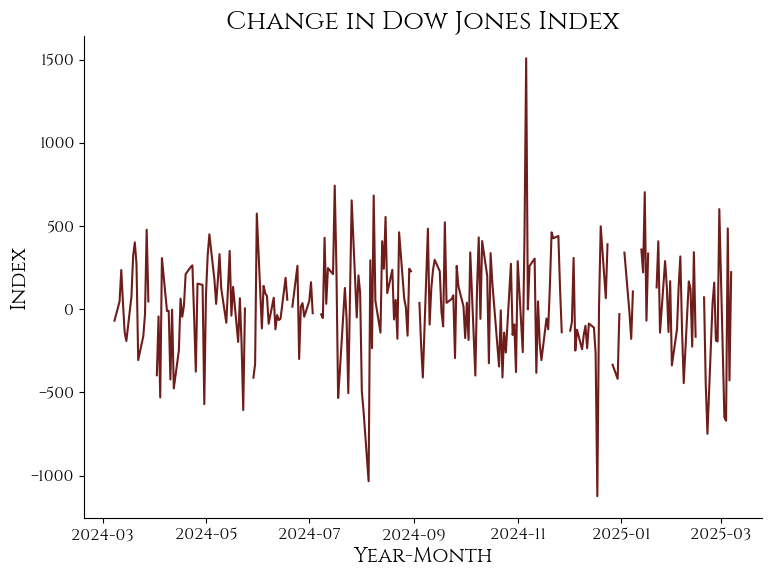

In [ ]:
# process data
dowJones_df['change'] = dowJones_df['DJIA'].diff()

# create plot
with plt.rc_context(classic_style): # use context for styles not to interfere
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(dowJones_df.index, dowJones_df['change'], color=RED, linewidth=1.5)

    ax.set_title('Change in Dow Jones Index')
    decorate_regular_plot(ax, 'Year-Month', 'Index')

    # plt.savefig(f'{IMAGES_PATH}/time_series_example_Dow_Jones_change_small.png', dpi=300, transparent=True)

    plt.show()

### Random

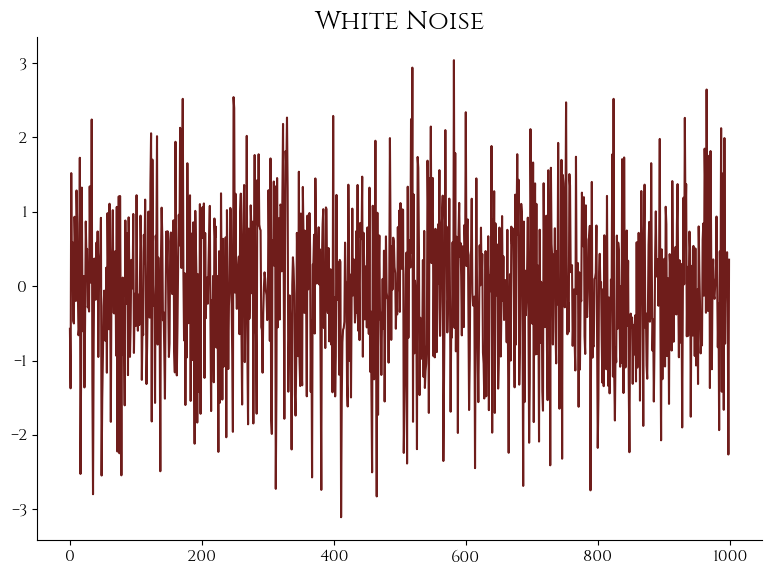

In [ ]:
# generate a normal distribution sample
sample_size=1000
random_series = pd.DataFrame(np.random.normal(size=sample_size)) 

# create plot
with plt.rc_context(classic_style): # use context for styles not to interfere
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(random_series, color=RED, linewidth=1.5)

    ax.set_title('White Noise')
    decorate_regular_plot(ax, '', '')

    # plt.savefig(f'{IMAGES_PATH}/time_series_example_random_small.png', dpi=300, transparent=True)

    plt.show()

### Sunspot Number

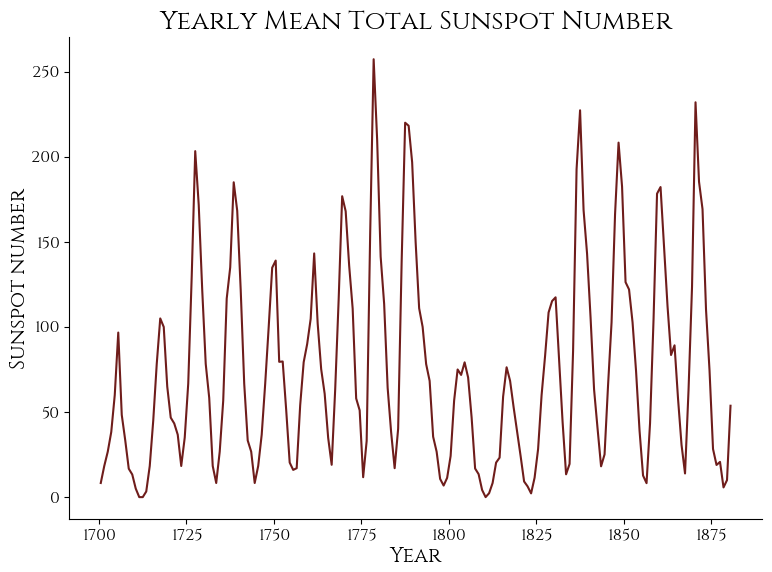

In [ ]:
# load data
sunspot_df = pd.read_csv(
    f'{DATASETS_PATH}/sunspots.csv',
    sep=';', 
    header=None, 
    names=['Year', 'Sunspots', 'Col3', 'Col4', 'Col5']
).set_index('Year').sort_index()

# process data
sunspot_df = sunspot_df[sunspot_df.index <= 1880.5]

# create plot
with plt.rc_context(classic_style): # use context for styles not to interfere
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(sunspot_df.index, sunspot_df['Sunspots'], color=RED, linewidth=1.5)

    ax.set_title('Yearly Mean Total Sunspot Number')
    decorate_regular_plot(ax, 'Year', 'Sunspot number')

    # plt.savefig(f'{IMAGES_PATH}/time_series_example_sunspots_small.png', dpi=300, transparent=True)

    plt.show()

### Airline Passengers

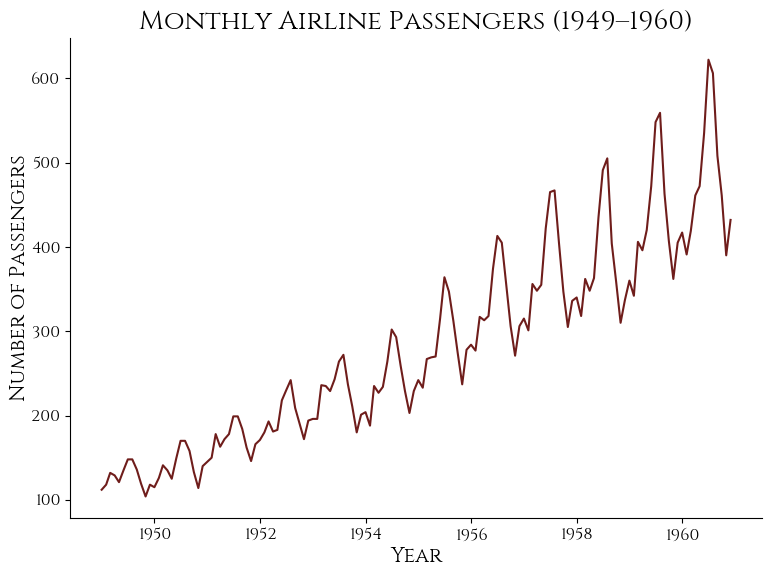

In [ ]:
# load data
airline_df = pd.read_csv(
    f'{DATASETS_PATH}/airline-passengers.csv',
    parse_dates=['Month'],
    dayfirst=False
).set_index('Month').sort_index()

# create plot
with plt.rc_context(classic_style): # use context for styles not to interfere
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(airline_df.index, airline_df['Passengers'], color=RED, linewidth=1.5)

    ax.set_title('Monthly Airline Passengers (1949–1960)')
    decorate_regular_plot(ax, 'Year', 'Number of Passengers')

    # plt.savefig(f'{IMAGES_PATH}/time_series_example_airline_small.png', dpi=300, transparent=True)

    plt.show()

<center> <h1> Lag Plots </h1> </center>

In [1720]:
plt.rcdefaults() # reset to defauls

## Helper functions

In [1721]:
# helper function to decorate plots
def decorate_lag_plot(ax, xname: str, 
                          yname: str, 
                          loc=None) -> None:
    SIZE_TICKS = 12

    # x and y axis labels
    ax.set_xlabel(xname, fontsize=20)
    ax.set_ylabel(yname, fontsize=20)

    # adjust tick labels size
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    if loc:
        ax.legend(fontsize=10, loc=loc)

    plt.grid(True, linestyle='--', linewidth=0.05)
    plt.tight_layout()

In [1722]:
# main function for creating lag plots
def lag_plot(df: pd.DataFrame, 
             value_name: str, 
             l: int=1, 
             file_name: str=None) -> None:
    lag_df = pd.DataFrame(df[value_name])
    lag_df['lag'] = df[value_name].shift(l)

    lag_df.dropna(inplace=True)

    _, ax = plt.subplots(figsize=(7, 6))

    decorate_lag_plot(ax, r'$y_t$', f'$y_{{t + {l}}}$', '')

    sns.scatterplot(data=lag_df, 
                    x=value_name,
                    y="lag", 
                    color=RICH_BLACK, 
                    size=100, 
                    legend=False, 
                    ax=ax)

    if file_name:
        plt.savefig(f'{IMAGES_PATH}/{file_name}.png', dpi=300, transparent=True)

    plt.show()

### Wine Australia

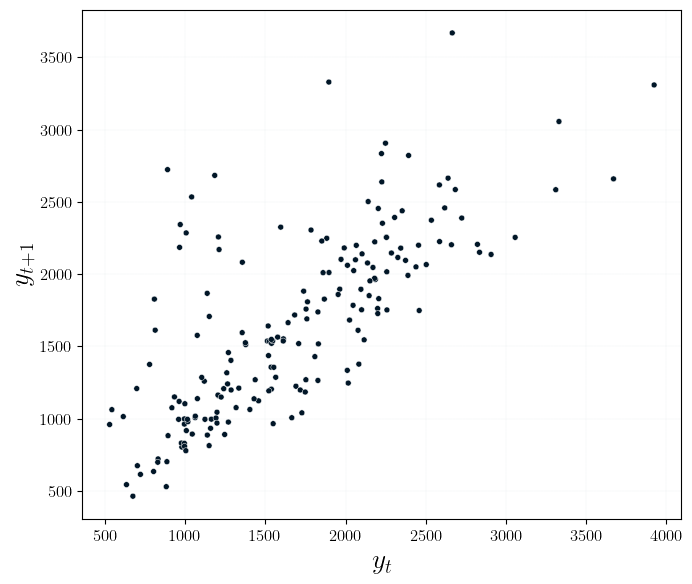

In [1723]:
# load data
wine_df = pd.read_csv(
    f'{DATASETS_PATH}/AusWineSales.csv',
    parse_dates=['YearMonth'],
    dayfirst=False
).set_index('YearMonth').sort_index()

# create plot
with plt.rc_context(lag_plot_style): # use context for styles not to interfere
    lag_plot(wine_df, 'Red', l=1, file_name=None)

### Random

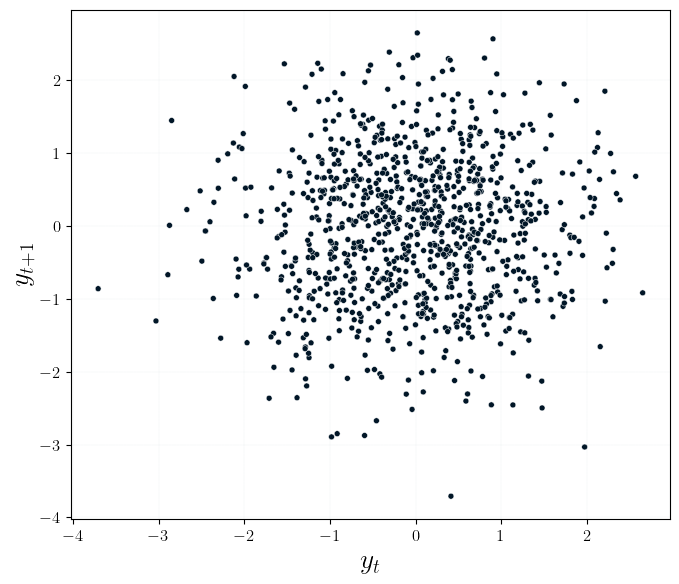

In [1724]:
# generate a normal distribution sample
sample_size=1000
random_series = pd.DataFrame(np.random.normal(size=sample_size)) 

# create plot
with plt.rc_context(lag_plot_style): # use context for styles not to interfere
    lag_plot(random_series, 0, l=1, file_name=None)

<center> <h1> Correlation Matrices </h1> </center>

In [1725]:
plt.rcdefaults() # reset to defauls

## Helper functions

In [1726]:
# main function for creating correlation matrix plots
def corr_matrix_plot(df: pd.DataFrame, value_name: str, 
                                       n: int=10, 
                                       file_name: str=None) -> None:
    lag_df = pd.DataFrame(df[value_name]).rename(columns={value_name: '$y_t$'})
    for l in range(1, n+1):
        lag_df[f'$y_{{t + {l}}}$'] = df[value_name].shift(l)

    lag_df.dropna(inplace=True)

    # compute the correlation matrix
    corr = lag_df.corr()

    # generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # set up the matplotlib figure
    _, _ = plt.subplots(figsize=(11, 9))

    # generate a custom diverging colormap
    cmap = LinearSegmentedColormap.from_list('custom_cmap', [RICH_BLACK, RED])

    # draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                      square=True, linewidths=.5, cbar_kws={"shrink": .5})

    if file_name:
        plt.savefig(f'{IMAGES_PATH}/{file_name}.png', dpi=300, transparent=True)

    plt.show()

### Avocado Sales

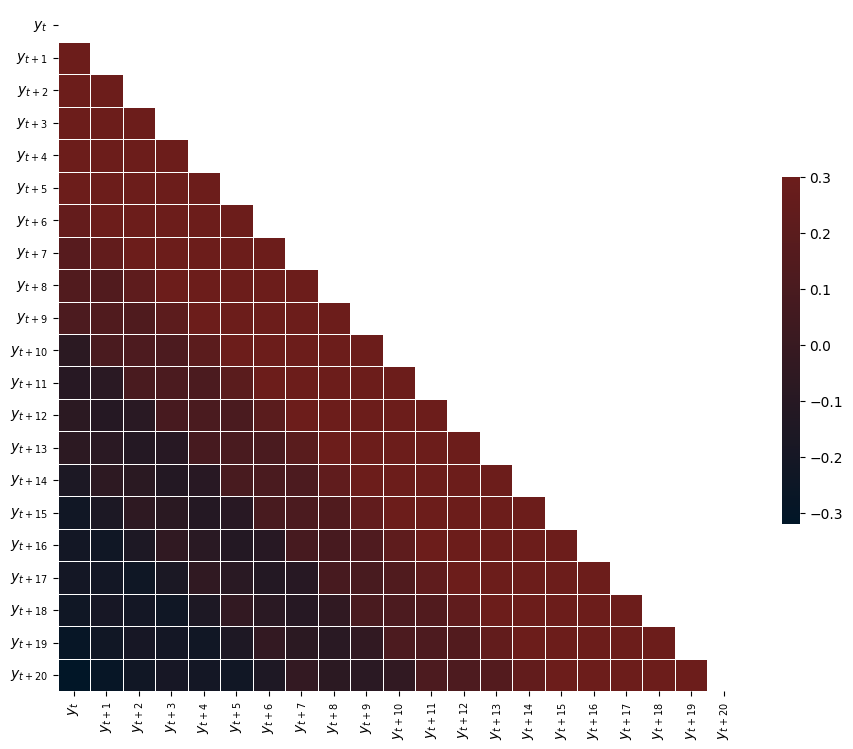

In [1727]:
# load data
avocado_df = pd.read_csv(
    f'{DATASETS_PATH}/avocado.csv',
    parse_dates=['Date'],
    dayfirst=False
).set_index('Date').sort_index()

# process data
avocado_df = avocado_df.groupby('Date')['Total Volume'].mean().reset_index()
avocado_df = avocado_df.set_index('Date').sort_index()

# create plot
corr_matrix_plot(avocado_df, 'Total Volume', n=20, file_name=None)

<center> <h1> Autocorrelation Function (ACF) </h1> </center>

In [1728]:
plt.rcdefaults() # reset to defauls

## Helper functions

In [1729]:
# helper function to decorate plots
def decorate_acf(ax, loc=None) -> None:
    SIZE_TICKS = 24

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # Adjust the font size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    if loc:
        plt.legend(fontsize=10, loc=loc)

    # Adjust layout
    plt.tight_layout()

### Wine Australia

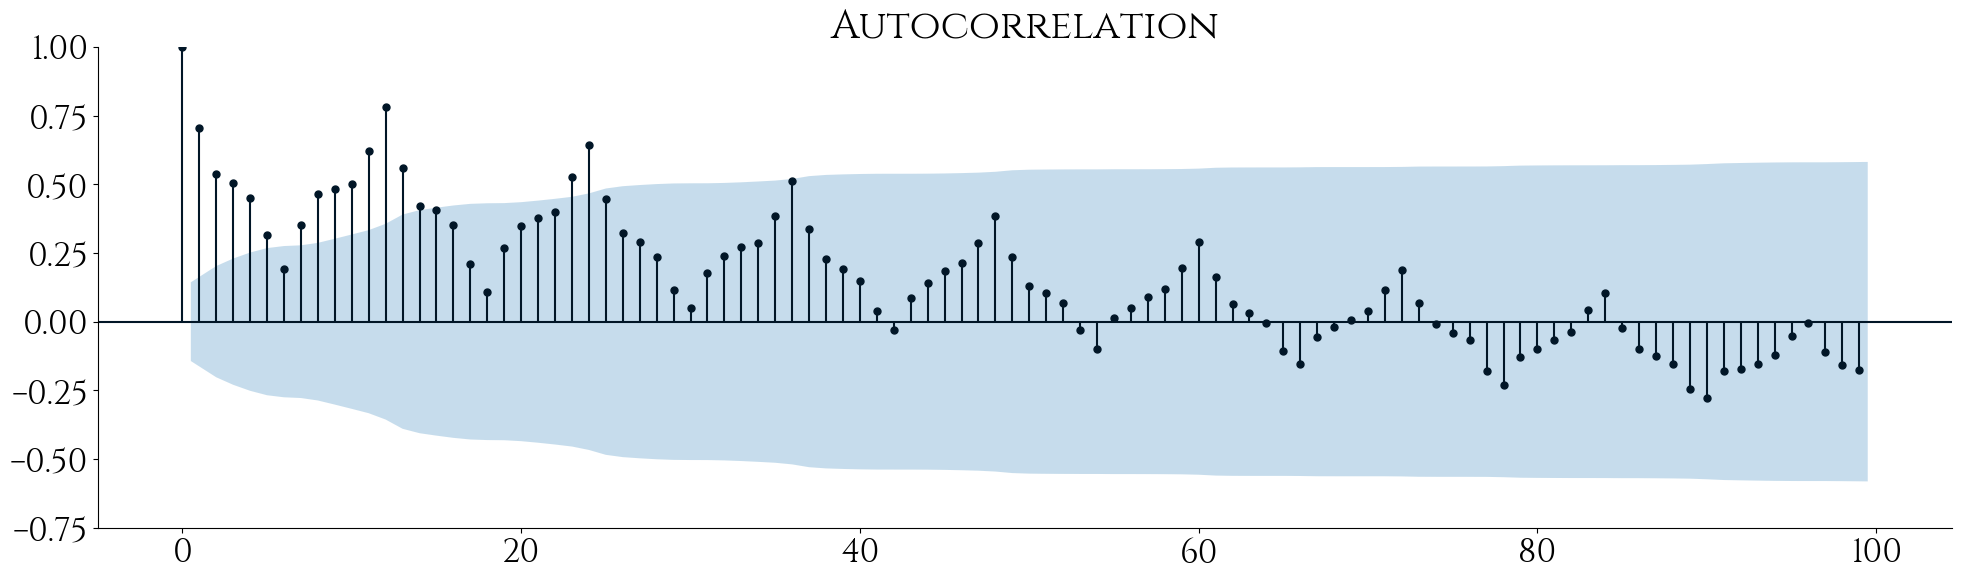

In [1730]:
# load data
wine_df = pd.read_csv(
    f'{DATASETS_PATH}/AusWineSales.csv',
    parse_dates=['YearMonth'],
    dayfirst=False
).set_index('YearMonth').sort_index()

# create plot
with plt.rc_context(acf_plot_style): # use context for styles not to interfere
    _, ax = plt.subplots(figsize=(20, 6))

    decorate_acf(ax)

    sm.graphics.tsaplots.plot_acf(wine_df['Red'], 
                                  lags=np.arange(0, 100, 1), 
                                  ax=ax, 
                                  color=RICH_BLACK, 
                                  vlines_kwargs={'colors': RICH_BLACK, 
                                                 'linewidth': 1.5});

    ax.set_ylim(-0.75, 1)
    ax.grid(False)

    # plt.savefig(f'{IMAGES_PATH}/acf_wine.png', dpi=300, transparent=True)

    plt.show();